In [77]:
# install anaconda:
# https://www.anaconda.com/products/individual

import pandas as pd
import numpy as np

df = pd.read_csv("1612409256442_43edc4ce__cae3__45c5__b247__a9d05d6631de_bodyPartsJerkRaw.csv", header=None)

# shows top 10 rows
df.head(10)

,0,1,2,3,4,5,6
0,13276.185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,13482.750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,13656.870,7.712790,7.712790,5.970725,5.970725,5.970725,5.970725
3,13820.180,6.183700,6.559537,5.396091,5.396091,5.396091,5.396091
4,13912.530,4.903669,4.903669,4.513032,4.513032,4.513032,4.513032
5,14030.060,3.677751,6.470123,3.481192,3.481192,3.481192,3.481192
6,14174.690,2.942201,13.765288,2.899304,2.899304,2.899304,2.899304
7,14338.380,2.689317,16.006393,2.689317,2.689317,2.689317,2.689317
8,14445.035,2.693140,13.719766,2.469468,2.469468,2.469468,2.469468
9,14551.800,2.670057,12.014355,2.620749,2.620749,2.620749,2.620749


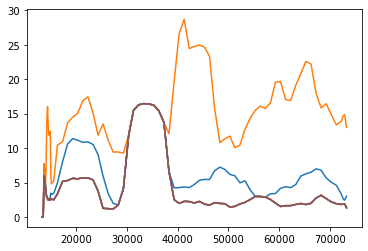

In [86]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.

timestamps = df.iloc[:,0]
values = df.drop(columns=0)

for (name, data) in values.iteritems():
    ax.plot(timestamps, data)


81.1333233635204


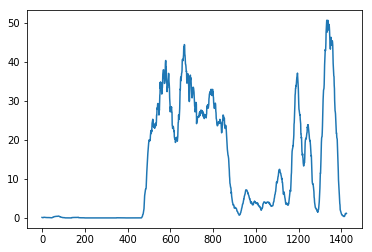

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# eyeDxFileClose = pd.read_csv("closeEyeDistanceDataMeasures_2_8_2021_5_54.csv", header=None)  
# eyeDxFileClose = pd.read_csv("CloseEyeDistanceDataMeasures2_2_11_2021.csv", header=None)  
# eyeDxFileClose = pd.read_csv("farEyeDistanceDataMeasures_2_11_2021._10_50_PM.csv", header=None)  mediumEyeDistanceDataMeasures_2_10_2021.csv
eyeDxFileClose = pd.read_csv("CloseEyeDistanceDataMeasures2_2_11_2021.csv", header=None) 


# eyeDxFileMedium = pd.read_csv("mediumEyeDistanceDataMeasures_2_10_2021.csv", header=None)

fig, ax = plt.subplots()  # Create a figure containing a single axes.

eyeDistance = eyeDxFileClose.iloc[:,1]
avgEyeDistance = np.median( eyeDistance );
print(avgEyeDistance );

# eyeDistance = eyeDxFileMedium.iloc[:,1]
# avgEyeDistance = np.mean( eyeDistance );
# print(avgEyeDistance );

# values = eyeDxFileClose.drop(columns=0)

# for (name, data) in values.iteritems():
index = np.arange(eyeDistance.size)

ax.plot(index, eyeDxFileClose.iloc[:,2])


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json



# eyeDxFileClose = pd.read_csv("closeEyeDistanceDataMeasures_2_8_2021_5_54.csv", header=None) 
eyeDxFileClose = pd.read_csv("CloseEyeDistanceDataMeasures2_2_11_2021.csv", header=None) 
# eyeDxFileClose = pd.read_csv("farEyeDistanceDataMeasures_2_11_2021._10_50_PM.csv", header=None) 


# eyeDxFileMedium = pd.read_csv("mediumEyeDistanceDataMeasures_2_10_2021.csv", header=None)

# data is structured:
# time, eye distance, dx for each keypoint, dy for each keypoint, windowed var x for each keypoint, windowed var y for each keypoint, jerk x for each keypoint, jerk y for each keypoint

colNames = ["dx min", "dx max", "dx median", "dx mean",
            "dy min" , "dy max", "dy median", "dy mean", 
            "win var x min", "win var x max", "win var x median", "win var x mean", 
            "win var y min", "win var y max", "win var y median", "win var y mean", 
            "jerk x min", "jerk x max", "jerk x median", "jerk x mean",
            "jerk y min", "jerk y max", "jerk y median","jerk y mean"]

varNames = ["dxMin", "dxMax", "dxMedian", "dxMean",
            "dyMin" , "dyMax", "dyMedian", "dyMean", 
            "winVarXMin", "winVarXMax", "winVarXMedian", "winVarXMean", 
            "winVarYMin", "winVarYMax", "winVarYMedian", "winVarYMean", 
            "jerkXMin", "jerkXMax", "jerkXMedian", "jerkXMean",
            "jerkYMin", "jerkYMax", "jerkYMedian","jerkYMean"]

colNameIndex = 0
withinColNamesIndex = -1; 

dataCount = eyeDxFileClose.shape[0]
# dataCount = eyeDxFileMedium.shape[0]
outliersToRemove = np.round(dataCount * 0.05) - 1;  #drop highest 3 data as outliers. note this will fail on unrealistically small datasets but... oh well
selectedMaxCount = np.round(dataCount * 0.05) - 1; 
selectedMaxCount = np.maximum( selectedMaxCount, 1 )

# DX Min @ close,	DX Max @ close,	DX Median @ close,	DX Mean @ close,	Windowed Var X  Min @ close,	Windowed Var X Max @ close,	Windowed Var X Median @ close,	Windowed Var X Mean @ close,	Jerk X Min @ close,	Jerk X Max @ close,	Jerk X Median @ close,	Jerk X Mean @ clkose,

rows, cols = ( 17, 6 ) 

dataMin = [[0 for i in range(cols)] for j in range(rows)]  ; 
dataMax = [[0 for i in range(cols)] for j in range(rows)]  ; 
dataMean = [[0 for i in range(cols)] for j in range(rows)]  ; 
dataMedian = [[0 for i in range(cols)] for j in range(rows)]  ; 

for i in range(2, eyeDxFileClose.shape[1]-1 ): 
# for i in range(2, eyeDxFileMedium.shape[1]-1 ):

    # create header for the printed data
    # print("**********")
    # print("i =", withinColNamesIndex)
    # print(colNames[colNameIndex])

    # update the column name if needed
    withinColNamesIndex = withinColNamesIndex + 1
    if(withinColNamesIndex>=17):
        withinColNamesIndex=0
        colNameIndex = colNameIndex + 1

    # do the calculations
    dataCol = eyeDxFileClose.iloc[:, i]
    # dataCol = eyeDxFileMedium.iloc[:, i]
    dataColSorted = np.sort(dataCol)
    # index = list(range(0, dataCol.size))
    rawMax = np.max(dataCol)
    min = np.min(dataCol)

    # calculate max by dropping 2 highest as outliers then averaging top 5%
    # try this -- will also look at plots later
    start = int( dataCount- ( selectedMaxCount+outliersToRemove ) )
    end = int(dataCount-(outliersToRemove+1) )
    maxValues = dataColSorted[start:end]
    max = np.mean(maxValues)

    dataColOutliersRemoved = dataColSorted[0:end] ; 
    mean = np.mean(dataColOutliersRemoved)
    median = np.median(dataColOutliersRemoved)

    # save the values in the array
    dataMin[withinColNamesIndex][colNameIndex] = min; 
    dataMax[withinColNamesIndex][colNameIndex] = max; 
    dataMedian[withinColNamesIndex][colNameIndex] = median; 
    dataMean[withinColNamesIndex][colNameIndex] = mean; 

    # print the stats
    # print( withinColNamesIndex, ": ", colNames[colNameIndex], ": ", end='' )
    # print(  min , end='' )
    # print( ", ", colNames[colNameIndex + 1], ": ", end='' )
    # print(  max , end='' )
    # print( ", ", colNames[colNameIndex + 2], ": ", end='' )
    # print(  median , end='' )
    # print( ", ", colNames[colNameIndex + 3], ": ", end='' )
    # print(  mean )

    # print( "min: " , min , ", "  , end='')
    # print( "raw max: " , rawMax , ", "  , end='')
    # print( "mean: " , mean , ", "  , end='')
    # print( "median: " , median , ", " , end='' )

    # print the footer
    # print(" ")

columnsMin = list(zip(*dataMin))
columnsMax = list(zip(*dataMax))
columnsMedian = list(zip(*dataMedian))
columnsMean = list(zip(*dataMean))

dict = {
        # dx
        varNames[0]: columnsMin[0], 
        varNames[1]: columnsMax[0],
        varNames[2]: columnsMedian[0],
        varNames[3]: columnsMean[0],

        # dy
        varNames[4]: [val[1] for val in dataMin], 
        varNames[5]: [val[1] for val in dataMax],
        varNames[6]: [val[1] for val in dataMedian],
        varNames[7]: [val[1] for val in dataMean],

        # windowed var x
        varNames[8]: [val[2] for val in dataMin], 
        varNames[9]: [val[2] for val in dataMax],
        varNames[10]: [val[2] for val in dataMedian],
        varNames[11]: [val[2] for val in dataMean],

        # windowed var y
        varNames[12]: [val[3] for val in dataMin], 
        varNames[13]: [val[3] for val in dataMax],
        varNames[14]: [val[3] for val in dataMedian],
        varNames[15]: [val[3] for val in dataMean],

        # jerk x
        varNames[16]: [val[4] for val in dataMin], 
        varNames[17]: [val[4] for val in dataMax],
        varNames[18]: [val[4] for val in dataMedian],
        varNames[19]: [val[4] for val in dataMean],

        # jerk y
        varNames[20]: [val[5] for val in dataMin], 
        varNames[21]: [val[5] for val in dataMax],
        varNames[22]: [val[5] for val in dataMedian],
        varNames[23]: [val[5] for val in dataMean]

        }

for col in dict:
     dict[col] = [float(x) for x in dict[col]] 

df = pd.DataFrame(dict) 
# df.to_csv(r'eyeDistanceCloseDataFrame1Analysis.csv', index=False, header=True)
df.to_csv(r'eyeDistanceCloseDataFrame1Analysis2.csv', index=False, header=True)
#

# with open("eyeDistanceCloseDataFrame1Analysis.json", "w") as outfile:  
with open("eyeDistanceCloseDataFrame1Analysis2.json", "w") as outfile:  
    json.dump(dict, outfile) 



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

synchDataFile = pd.read_csv("synchAndwinVarInMidiFile_2_15_2021_2pm.csv", header=None) 

# data is structured:
# time, eye distance, dx for each keypoint, dy for each keypoint, windowed var x for each keypoint, windowed var y for each keypoint, jerk x for each keypoint, jerk y for each keypoint

# dataMin = [0, 0]; 
# dataMax = [0, 0];
# dataMean = [0, 0];
# dataMedian = [0, 0]; 

colNames = ["synchScore", "windowedVarScore"]
varNames = ["synchScoreMin",
            "synchScoreMax",
            "synchScoreMean",
            "synchScoreMedian",
            "windowedVarScoreMin",
            "windowedVarScoreMax",
            "windowedVarScoreMean",
            "windowedVarScoreMedian"]

colNameIndex = 0
withinColNamesIndex = -1; 

dataCount = synchDataFile.shape[0]

dataMin = [0, 0]; 
dataMax = [0, 0];
dataMean = [0, 0];
dataMedian = [0, 0]; 

for i in range(1, 3): 

    # do the calculations
    dataCol = synchDataFile.iloc[:, i]
    dataColSorted = np.sort(dataCol)
    min = np.min(dataCol)
    rawMax = np.max(dataCol)
    mean = np.mean(dataCol)
    median = np.median(dataCol)

    # save the values in the array
    dataMin.append( min ); 
    dataMax.append( rawMax ); 
    dataMedian.append( median ); 
    dataMean.append( mean ); 

    # print the stats
    # print( withinColNamesIndex, ": ", colNames[colNameIndex], ": ", end='' )
    # print(  min , end='' )
    # print( ", ", colNames[colNameIndex + 1], ": ", end='' )
    # print(  max , end='' )
    # print( ", ", colNames[colNameIndex + 2], ": ", end='' )
    # print(  median , end='' )
    # print( ", ", colNames[colNameIndex + 3], ": ", end='' )
    # print(  mean )

    # print the header
    print("**** " + colNames[i] )

    print( "min: " , min , ", "  , end='')
    print( "raw max: " , rawMax , ", "  , end='')
    print( "mean: " , mean , ", "  , end='')
    print( "median: " , median , ", " , end='' )

    # print the footer
    print("****")

# columnsMin = list(zip(*dataMin))
# columnsMax = list(zip(*dataMax))
# columnsMedian = list(zip(*dataMedian))
# columnsMean = list(zip(*dataMean))

dict = {
        varNames[0]: dataMin[0], 
        varNames[1]: dataMax[0],
        varNames[2]: dataMean[0], 
        varNames[3]: dataMedian[0],  
        varNames[4]: dataMin[1], 
        varNames[5]: dataMax[1],
        varNames[6]: dataMean[1], 
        varNames[7]: dataMedian[1],       
        }

for col in dict:
     dict[col] = [float(x) for x in dict[col]] 

df = pd.DataFrame(dict) 
# df.to_csv(r'eyeDistanceCloseDataFrame1Analysis.csv', index=False, header=True)
df.to_csv(r'midiSynchScoreAndDx.csv', index=False, header=True)
#

# with open("eyeDistanceCloseDataFrame1Analysis.json", "w") as outfile:  
with open("midiSynchScoreAndDx.json", "w") as outfile:  
    json.dump(dict, outfile) 



AttributeError: 'int' object has no attribute 'append'